### Gombosuren.A, MUST

### Neural Network for differential equations

Нейрол нетвөрк ашиглан дифференциал тэгшитгэлийн тооцооллыг ойролцоогоор шийдэх аргачлал.

[reference1](https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c)

#### import libs


In [1]:
import autograd.numpy as np;
from autograd import grad; 
import autograd.numpy.random as npr;
from autograd.core import primitive;
from matplotlib import pyplot as plt;
%matplotlib inline

In [2]:
nx = 10;
dx = 1 / nx;

In [3]:
def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

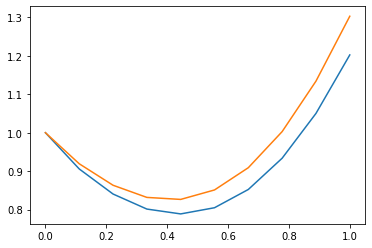

In [4]:
x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1. # IC

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx
  
plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [6]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

# x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print loss_function(W, x_space)

0.06414296180662717
[array([[ 0.97644639,  1.12635874, -1.4901668 , -0.92417708,  0.16858026,
         0.79023245,  0.41992301,  4.27630621, -0.00995866, -0.54729795]]), array([[-0.17482613],
       [ 1.74116329],
       [-2.15365916],
       [-1.37588014],
       [-0.61641342],
       [ 0.3665156 ],
       [ 0.31181536],
       [-0.41372058],
       [ 0.39181979],
       [-0.08947994]])]


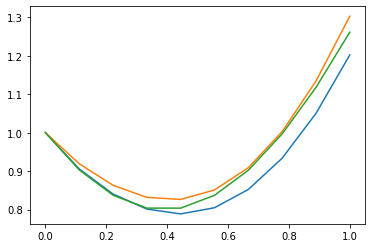

In [8]:

print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

print(W)

plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.plot(x_space, res)
plt.show()